# Optimziers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

### Optimizers

#### 1. SGD (Stocastic Gradient Descent)

In [2]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.learning_rate * grads[key]

#### 2. Momentum

In [3]:
class Momentum:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.learning_rate * grads[key]
            params[key] += self.v[key]

#### 3. Nesterov
- Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)

In [4]:
class Nesterov:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.learning_rate * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.learning_rate * grads[key]

#### 4. AdaGrad
- John Duchi, Elad Hazan, Yoram Singer, "Adaptive Subgradient Methods for Online Learning and Stochastic Optimization," Journal of Machine Learning Research 12 (2011) 2121-2159.
- http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf

In [5]:
class AdaGrad:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.learning_rate * grads[key] / np.sqrt(self.h[key] + 1e-7)

#### 5. RMSprop
- Tieleman, T. and Hinton, G., Divide the gradient by a running average of its recent magnitude, COUSERA: Neural Networks for Machine LearningRMSProp: Lecture 6.5, 2012
- https://www.coursera.org/learn/neural-networks/lecture/YQHki/rmsprop-divide-the-gradient-by-a-running-average-of-its-recent-magnitude

In [6]:
class RMSprop:
    def __init__(self, learning_rate=0.01, decay_rate = 0.99):
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.learning_rate * grads[key] / np.sqrt(self.h[key] + 1e-7)

#### 6. Adam
- Diederik P. Kingma, Jimmy Ba, "Adam: A Method for Stochastic Optimization," arXiv:1412.6980, Dec., 2014.
- https://arxiv.org/pdf/1412.6980.pdf

In [7]:
class Adam:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        learning_rate_t  = self.learning_rate * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * grads[key] ** 2
            params[key] -= learning_rate_t * self.m[key] / np.sqrt(self.v[key] + 1e-7)

In [8]:
optimizers = OrderedDict()
optimizers["SGD"] = SGD(learning_rate=0.95)
optimizers["Momentum"] = Momentum(learning_rate=0.1)
optimizers["Nesterov"] = Nesterov(learning_rate=0.08)
optimizers["AdaGrad"] = AdaGrad(learning_rate=1.5)
optimizers["RMSprop"] = RMSprop(learning_rate=0.2)
optimizers["Adam"] = Adam(learning_rate=0.3)

## Funcions
- $f(x) = \frac{1}{20}x^2 + y^2$
- $f'(x) = \frac{1}{10}x + 2y$

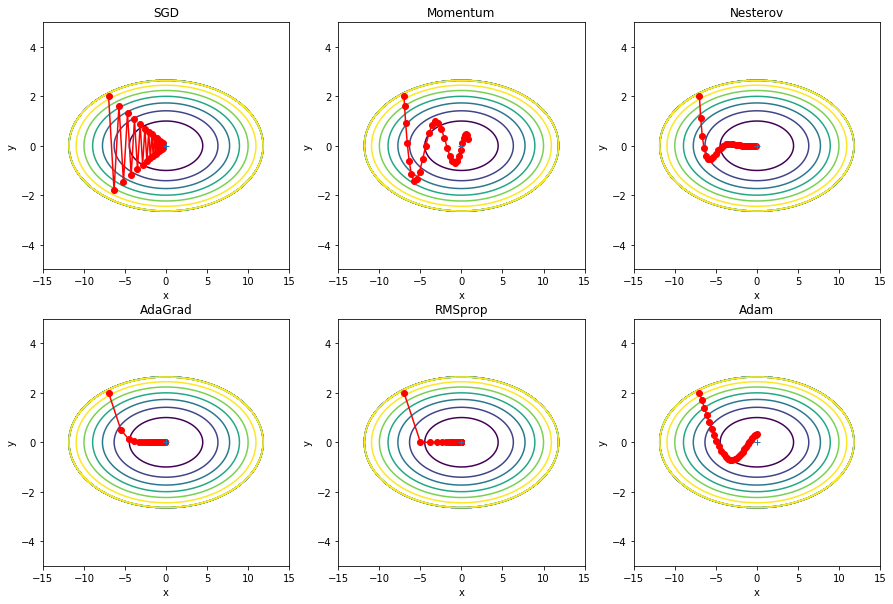

In [9]:
def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

idx = 1
fig = plt.figure(figsize=(15, 10))

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-15, 15, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 

    sub_figure = fig.add_subplot(230 + idx)
    idx += 1
    sub_figure.plot(x_history, y_history, 'o-', color="red")
    sub_figure.contour(X, Y, Z)
    sub_figure.set_xlim(-15, 15)
    sub_figure.set_ylim(-5, 5)
    
    sub_figure.plot(0, 0, '+')
    sub_figure.set_title(key)
    sub_figure.set_xlabel("x")
    sub_figure.set_ylabel("y")
    
plt.show()